In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

from pathlib import Path

from tqdm import tqdm
import numpy as np
import pandas as pd
import dataframe_image as dfi
import matplotlib.pyplot as plt

import src.visualization.visualize as visualize

In [2]:
PROCESSED_DATA_FOLDER_PATH = Path("../data/processed")


## Load data

In [3]:
all_land_df = pd.read_parquet(PROCESSED_DATA_FOLDER_PATH.joinpath("CWatM_data", "all_land.parquet"))
forcings_land_df = pd.read_parquet(PROCESSED_DATA_FOLDER_PATH.joinpath("CWatM_data", "forcings_land.parquet"))
outputs_land_df = pd.read_parquet(PROCESSED_DATA_FOLDER_PATH.joinpath("CWatM_data", "outputs_land.parquet"))

data_df = pd.concat((all_land_df, forcings_land_df, outputs_land_df), axis=1)
data_df

minSoilDepthFrac_forest  interceptcap_forest  kc_forest  \
lon     lat                                                              
-179.75 65.25                 0.000000             0.006764  19.357376   
        65.75                 0.000000             0.006719  19.279093   
        66.25                 0.000000             0.006648  19.339777   
        66.75                 0.000000             0.005358  17.795208   
        67.25                 0.000000             0.003377  15.837404   
...                                ...                  ...        ...   
 179.75 67.75                 0.000000             0.003501  16.208113   
        68.25                 0.000000             0.003679  16.521162   
        68.75                 0.000000             0.003539  16.235201   
        70.75                36.963001             0.000000  20.536507   
        71.25                 0.000000             0.003700  16.439453   

               rootFraction1_forest  rootFraction2_forest  \
lon     lat                                                 
-179.75 65.25             36.729450              0.270400   
        65.75             36.622589              0.377874   
        66.25             36.752480              0.247657   
        66.75             34.992661              1.999292   
        67.25             36.223106              0.776040   
...                             ...                   ...   
 179.75 67.75             36.446999              0.553171   
        68.25             36.733624              0.266577   
        68.75             36.465374              0.532457   
        70.75             36.767658              0.232470   
        71.25             36.767899              0.232468   

               maxRootDepth_forest  minSoilDepthFrac_grassland  \
lon     lat                                                      
-179.75 65.25                 37.0                    0.000000   
        65.75                 37.0                    0.000000   
        66.25                 37.0                    0.000000   
        66.75                 37.0                    0.000000   
        67.25                 37.0                    0.000000   
...                            ...                         ...   
 179.75 67.75                 37.0                    0.000000   
        68.25                 37.0                    0.000000   
        68.75                 37.0                    0.000000   
        70.75                 37.0                   36.963001   
        71.25                 37.0                    0.000000   

               interceptcap_grassland  kc_grassland  rootFraction1_grassland  \
lon     lat                                                                    
-179.75 65.25                0.006764     19.357376                36.729450   
        65.75                0.006719     19.279093                36.622589   
        66.25                0.006648     19.339777                36.752480   
        66.75                0.005358     17.795208                34.992661   
        67.25                0.003377     15.837404                36.223106   
...                               ...           ...                      ...   
 179.75 67.75                0.003501     16.208113                36.446999   
        68.25                0.003679     16.521162                36.733624   
        68.75                0.003539     16.235201                36.465374   
        70.75                0.000000     20.536507                36.767658   
        71.25                0.003700     16.439453                36.767899   

               ...         rlds         rsds   sfcwind       hurs      huss  \
lon     lat    ...                                                            
-179.75 65.25  ...  3176.785645  1282.218994  5.423993  78.123260  0.002587   
        65.75  ...  3118.151611  1234.113892  4.362611  76.625023  0.002451   
        66.25  ...  3054.430664  1225.5347

## Explore "chanlen - potevap" relation

<div>
<img src="../reports/figures/CWatM_data/scatterplots/chanleng_potevap.png" width="1000"/>
</div>

In [4]:
region_1 = data_df[(data_df["chanleng"] < 30000) &
                   (data_df["potevap"] > 700)]
region_2 = data_df[(data_df["chanleng"] >= 30000) & (data_df["chanleng"] < 40000) &
                   (data_df["potevap"] > 700)]
region_3 = data_df[(data_df["chanleng"] >= 40000) & (data_df["chanleng"] < 58000) &
                   (data_df["potevap"] > 700)]
region_4 = data_df[(data_df["chanleng"] >= 58000)]


In [38]:
region_1

minSoilDepthFrac_forest  interceptcap_forest  kc_forest  \
lon     lat                                                               
-124.75  42.75                 5.771877             0.054086  43.871101   
         47.75                11.477714             0.062725  43.132664   
         48.25                 9.093851             0.055583  42.313892   
-124.25  40.25                10.035875             0.046076  42.772171   
         42.25                 6.677279             0.056236  45.889050   
...                                 ...                  ...        ...   
 179.25 -18.25                36.963001             0.024829  37.901302   
        -16.75                36.963001             0.025685  38.619694   
        -16.25                36.963001             0.025848  37.956734   
 179.75 -16.75                36.963001             0.025836  38.140179   
        -16.25                36.963001             0.025280  37.699928   

                rootFraction1_forest  rootFraction2_forest  \
lon     lat                                                  
-124.75  42.75             20.633390             15.524967   
         47.75             29.224054              7.524434   
         48.25             26.451117             10.182721   
-124.25  40.25             21.708475             14.797383   
         42.25             21.400719             15.099312   
...                              ...                   ...   
 179.25 -18.25             23.295666             13.446408   
        -16.75             23.296185             13.446120   
        -16.25             23.295589             13.446375   
 179.75 -16.75             23.295773             13.446298   
        -16.25             23.295931             13.446227   

                maxRootDepth_forest  minSoilDepthFrac_grassland  \
lon     lat                                                       
-124.75  42.75                 37.0                    5.771877   
         47.75                 37.0                   11.477714   
         48.25                 37.0                    9.093851   
-124.25  40.25                 37.0                   10.035875   
         42.25                 37.0                    6.677279   
...                             ...                         ...   
 179.25 -18.25                 37.0                   36.963001   
        -16.75                 37.0                   36.963001   
        -16.25                 37.0                   36.963001   
 179.75 -16.75                 37.0                   36.963001   
        -16.25                 37.0                   36.963001   

                interceptcap_grassland  kc_grassland  rootFraction1_grassland  \
lon     lat                                                                     
-124.75  42.75                0.054086     43.871101                20.633390   
         47.75                0.062725     43.132664                29.224054   
         48.25                0.055583     42.313892                26.451117   
-124.25  40.25                0.046076     42.772171                21.708475   
         42.25                0.056236     45.889050                21.400719   
...                                ...           ...                      ...   
 179.25 -18.25                0.024829     37.901302                23.295666   
        -16.75                0.025685     38.619694                23.296185   
        -16.25                0.025848     37.956734                23.295589   
 179.75 -16.75                0.025836     38.140179                23.295773   
        -16.25                0.025280     37.699928                23.295931   

                ...         rsds   sfcwind       hurs      huss   evap-total  \
lon     lat     ...                                                            
-124.75  42.75  ...  2306.973389  6.557449  82.590607  0.007092   629.948350   
         47.75  ...  1931.683960  3.524754  82.840805  0.006611   7

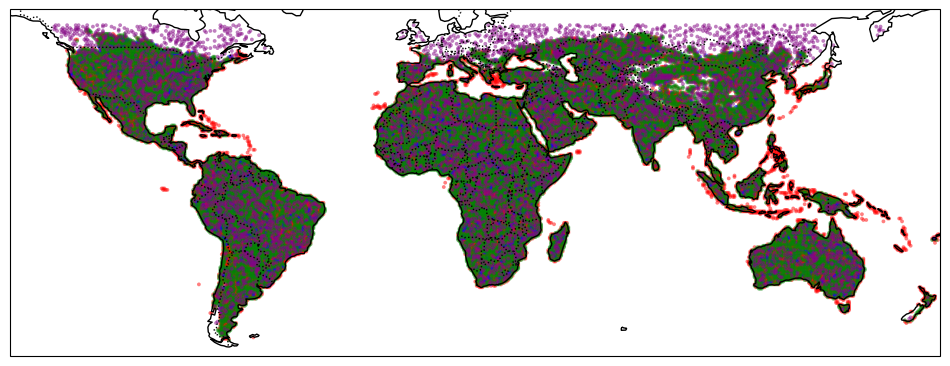

In [51]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

marker_style = MarkerStyle(marker=".",
                           fillstyle="full")

alpha = 0.5
size = 30

# Plot data points
ax.scatter(region_1.reset_index()['lon'], region_1.reset_index()['lat'],
           color='red', label='Region 1', 
           alpha=alpha, transform=ccrs.PlateCarree(),
           marker=marker_style, s=size, edgecolor="none",
           )
ax.scatter(region_2.reset_index()['lon'], region_2.reset_index()['lat'],
           color='blue', label='Region 2', 
           alpha=alpha, transform=ccrs.PlateCarree(),
           marker=marker_style, s=size, edgecolor="none",
           )
ax.scatter(region_3.reset_index()['lon'], region_3.reset_index()['lat'],
           color='green', label='Region 3', 
           alpha=alpha, transform=ccrs.PlateCarree(),
           marker=marker_style, s=size, edgecolor="none",
           )
ax.scatter(region_4.reset_index()['lon'], region_4.reset_index()['lat'],
           color='purple', label='Region 4', 
           alpha=alpha, transform=ccrs.PlateCarree(),
           marker=marker_style, s=size, edgecolor="none",
           )

plt.show()


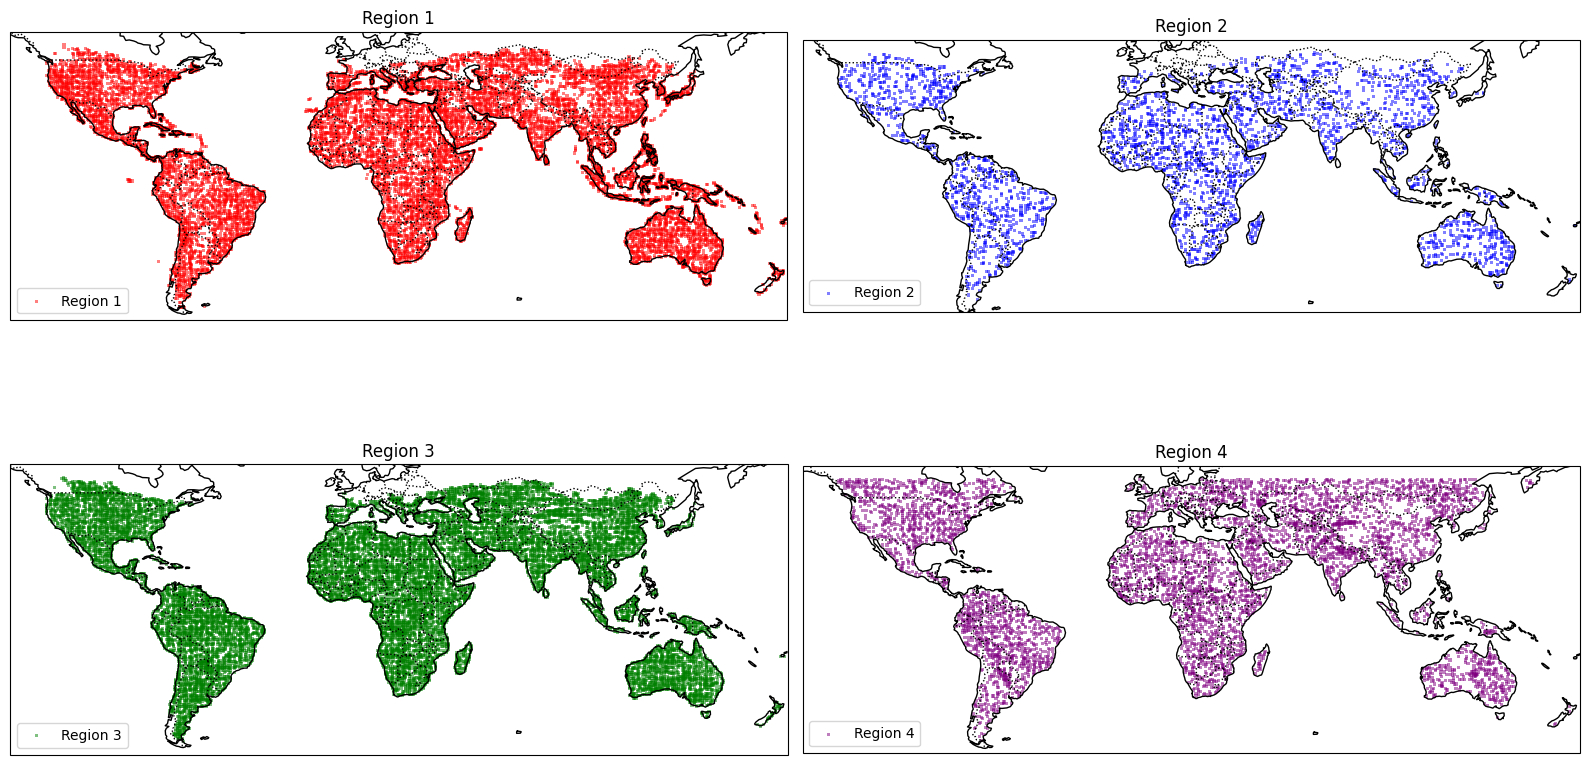

In [48]:

# Create a figure with 2x2 subplots, each with the PlateCarree projection
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10),
                         subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of regions, colors, and labels
regions = [region_1, region_2, region_3, region_4]
colors = ['red', 'blue', 'green', 'purple']
labels = ['Region 1', 'Region 2', 'Region 3', 'Region 4']

# Marker style
marker_style = MarkerStyle(marker="s", fillstyle="full")
alpha = 0.5
size = 5

# Plot each region in its own subplot
for ax, region, color, label in zip(axes, regions, colors, labels):
    # Add map features
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    
    # Plot data points
    ax.scatter(region.reset_index()['lon'], region.reset_index()['lat'],
               color=color, label=label, 
               alpha=alpha, transform=ccrs.PlateCarree(),
               marker=marker_style, s=size, edgecolor="none")
    
    # Set title and legend
    ax.set_title(label)
    ax.legend(loc='lower left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()